# Preprocess

In [152]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from pprint import pprint
from sklearn.model_selection import train_test_split

from util import load_prediction_todo, diff_timestamps
from lib.util.dataframe_preprocessor import DataframePreprocessor
from sklearn.preprocessing import LabelEncoder
from numpy import isnan
from sklearn.preprocessing import OneHotEncoder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
df_preprocessor = DataframePreprocessor.init_from_file("./data/historical_data.csv")

Data Imported: (197428, 16)


In [154]:
df_preprocessor.force_column_dtype("created_at", str)
df_preprocessor.force_column_dtype("actual_delivery_time", str)
df_preprocessor.force_column_dtype("store_primary_category", str)

In [155]:
df_preprocessor.filter_rows_by_condition("created_at", lambda x: x != "nan")
df_preprocessor.filter_rows_by_condition("actual_delivery_time", lambda x: x != "nan")
df_preprocessor.get_dataframe()

Shape Updated from (197428, 16) -> (197428, 16) | 0 Rows Removed.
Shape Updated from (197428, 16) -> (197421, 16) | 7 Rows Removed.


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,nan,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,nan,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,nan,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,nan,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,nan,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,nan,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,nan,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [156]:
created_at = df_preprocessor.get_dataframe()["created_at"]
actual_delivery_time = df_preprocessor.get_dataframe()["actual_delivery_time"]
delivery_seconds = [diff_timestamps(t1, t2) for (t1, t2) in zip(created_at, actual_delivery_time)]

In [157]:
len(delivery_seconds)

197421

In [158]:
df_preprocessor.remove_cols(["created_at", 'actual_delivery_time'], kind="name")
df_preprocessor.append_column("delivery_seconds", delivery_seconds)

Shape Updated from (197421, 16) -> (197421, 14) | 2 Columns Removed.


In [159]:
df_preprocessor.report_shape()

Shape of Data: (197421, 15)


In [160]:
def label_encode(col):
    encoder = LabelEncoder()
    transformed = encoder.fit_transform(df_preprocessor.get_dataframe()[col])
    return encoder, transformed

def transform_categorical_col(col):
    encoder, transformed = label_encode(col)
    df_preprocessor.remove_cols([col], kind="name")
    df_preprocessor.append_column(col, transformed)
    return encoder

In [161]:
store_cat_encoder = transform_categorical_col("store_primary_category")

Shape Updated from (197421, 15) -> (197421, 14) | 1 Columns Removed.


In [175]:
df = df_preprocessor.get_dataframe()
df = df[~np.isnan(df["delivery_seconds"])]
df.shape

(197414, 15)

In [193]:
def df_mean(df, col):
    val = df[col]
    val = val[~np.isnan(val)]
    return np.mean(val)

def df_median(df, col):
    val = df[col]
    val = val[~np.isnan(val)]
    return np.median(val)

def df_mode(df, col):
    from collections import Counter
    c = Counter(df[col])
    return c.most_common()[0][0]

In [101]:
train_features = ['market_id',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration']

In [200]:
nan_cols = []
for r in train_features:
    if any(np.isnan(df[r])):
        nan_cols.append(r)
        print(r)

market_id
order_protocol
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
estimated_store_to_consumer_driving_duration


In [202]:
default_vals = {
    "market_id": df_mode(df, "market_id"),
    "order_protocol": df_mode(df, "order_protocol"),
    "total_onshift_dashers": df_median(df, "total_onshift_dashers"),
    "total_busy_dashers": df_median(df, "total_busy_dashers"),
    "total_outstanding_orders": df_median(df, "total_busy_dashers"),
    "estimated_store_to_consumer_driving_duration": df_median(df, "estimated_store_to_consumer_driving_duration"),   
}

default_vals

{'market_id': 2.0,
 'order_protocol': 1.0,
 'total_onshift_dashers': 37.0,
 'total_busy_dashers': 37.0,
 'total_outstanding_orders': 37.0,
 'estimated_store_to_consumer_driving_duration': 515.0}

In [203]:
def fill_default(col):
    df[np.isnan(df[col])] = default_vals[col]

for col in nan_cols:
    fill_default(col)

In [208]:
X = df[train_features].as_matrix()
y = df["delivery_seconds"]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [206]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 1117590719.8942


Text(0, 0.5, 'Deviance')

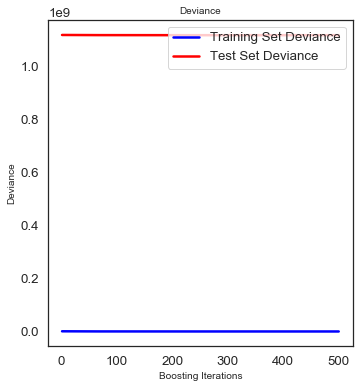

In [207]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')